In [5]:
# Load library
import bnlearn as bn
# Load example
df = bn.import_example('alarm')

[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


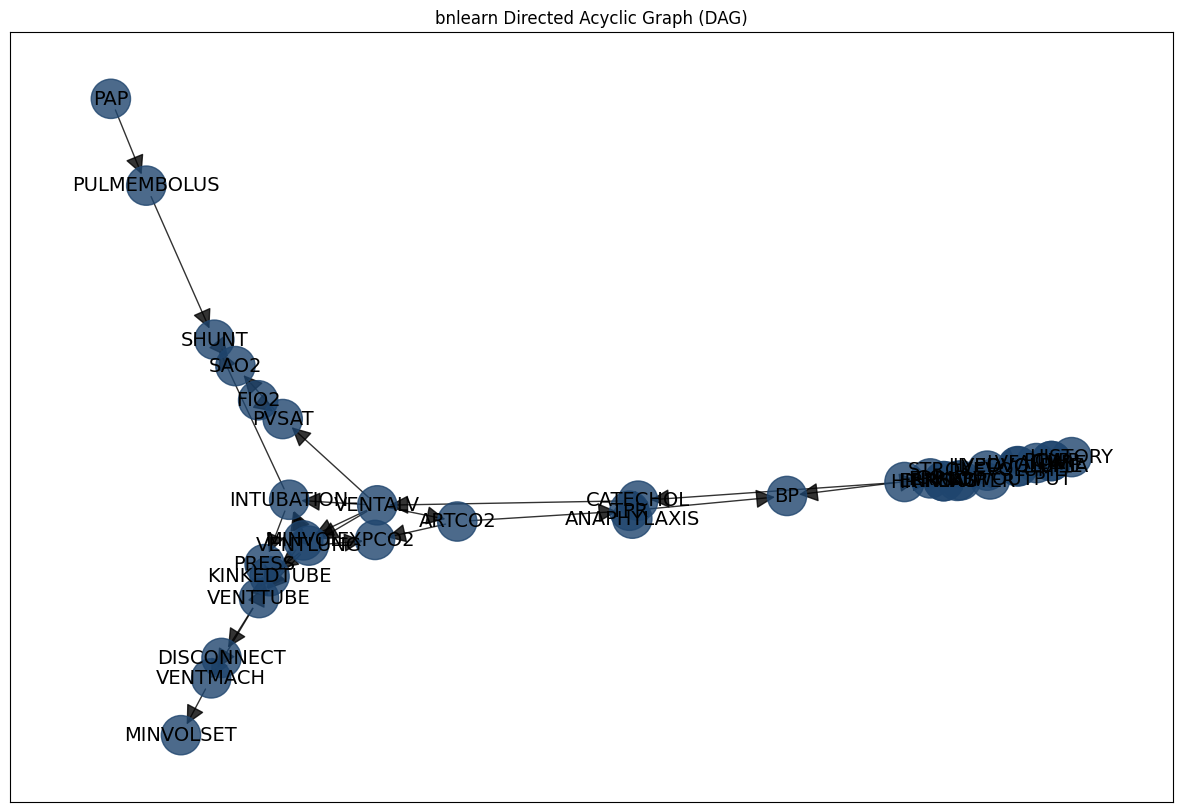

In [7]:

# Structure learning
model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot detected DAG
G = bn.plot(model)

G

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


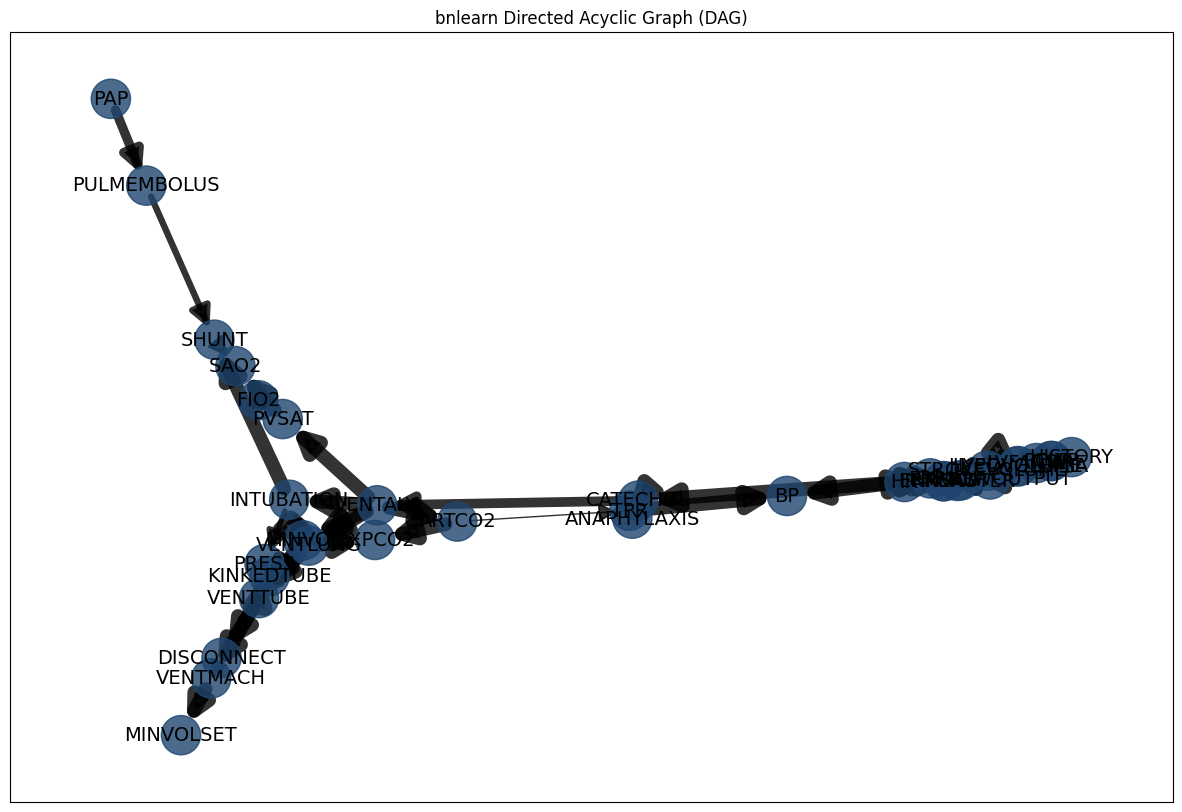

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'LVFAILURE': array([0.37572282, 0.05314943]),
  'HISTORY': array([0.40552218, 0.06863991]),
  'LVEDVOLUME': array([0.3599122 , 0.04526995]),
  'CVP': array([0.3884576 , 0.05846394]),
  'HYPOVOLEMIA': array([0.36025481, 0.04441907]),
  'STROKEVOLUME': array([0.33412447, 0.0335438 ]),
  'CO': array([0.28600817, 0.0133631 ]),
  'PCWP': array([0.3884576 , 0.05846394]),
  'ERRLOWOUTPUT': array([0.33654657, 0.01055742]),
  'HRBP': array([0.31181581, 0.00817485]),
  'HR': array([0.26417159, 0.0039474 ]),
  'HREKG': array([0.29736574, 0.00609984]),
  'HRSAT': array([0.29736574, 0.00609984]),
  'CATECHOL': array([ 0.03893723, -0.04448787]),
  'ERRCAUTER': array([0.30870829, 0.00687568]),
  'TPR': array([ 0.03149595, -0.07071719]),
  'ANAPHYLAXIS': array([ 0.03399396, -0.09132782]),
  'BP': array([ 0.16480741, -0.0323245 ]),
  'ARTCO2': array([-0.11406924, -0.0987693 ]),
  'EXPCO2': array([-0.183604

In [8]:

# Compute edge strength using chi-square independence test
model1 = bn.independence_test(model, df, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

    source        target        stat_test         p_value    chi_square    dof
--  ------------  ------------  -----------  ------------  ------------  -----
 0  LVFAILURE     HISTORY       True         0               7199.04         1
 1  LVEDVOLUME    CVP           True         0              12439            4
 2  LVEDVOLUME    HYPOVOLEMIA   True         0               6222.82         2
 3  LVEDVOLUME    LVFAILURE     True         0               5121.1          2
 4  LVEDVOLUME    CO            True         0               1629.56         4
 5  LVEDVOLUME    STROKEVOLUME  True         0               2369.49         4
 6  PCWP          LVEDVOLUME    True         0              15339.1          4
 7  STROKEVOLUME  LVFAILURE     True         0               2222.91         2
 8  STROKEVOLUME  HYPOVOLEMIA   True         0               2000.34         2
 9  ERRLOWOUTPUT  HRBP          True         0               5984.32         2
10  HR            HRSAT         True         0      

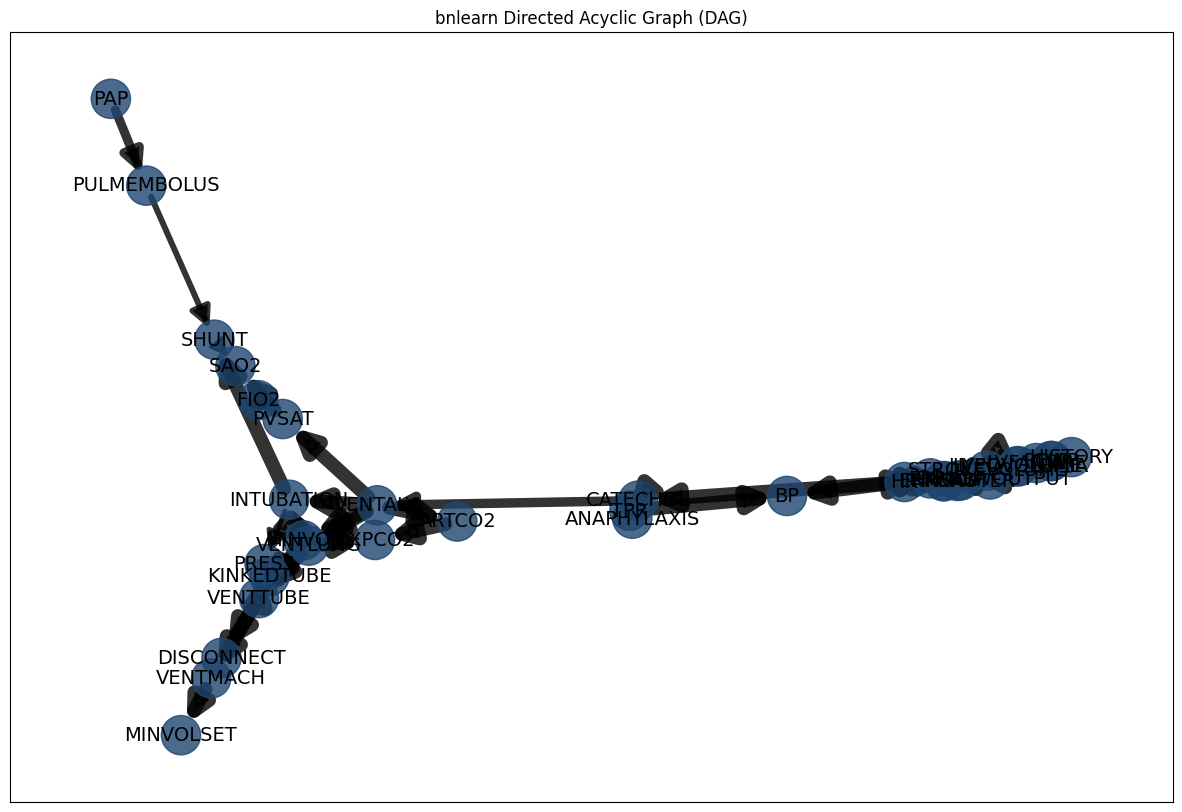

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'LVFAILURE': array([0.37572282, 0.05314943]),
  'HISTORY': array([0.40552218, 0.06863991]),
  'LVEDVOLUME': array([0.3599122 , 0.04526995]),
  'CVP': array([0.3884576 , 0.05846394]),
  'HYPOVOLEMIA': array([0.36025481, 0.04441907]),
  'STROKEVOLUME': array([0.33412447, 0.0335438 ]),
  'CO': array([0.28600817, 0.0133631 ]),
  'PCWP': array([0.3884576 , 0.05846394]),
  'ERRLOWOUTPUT': array([0.33654657, 0.01055742]),
  'HRBP': array([0.31181581, 0.00817485]),
  'HR': array([0.26417159, 0.0039474 ]),
  'HREKG': array([0.29736574, 0.00609984]),
  'HRSAT': array([0.29736574, 0.00609984]),
  'CATECHOL': array([ 0.03893723, -0.04448787]),
  'ERRCAUTER': array([0.30870829, 0.00687568]),
  'TPR': array([ 0.03149595, -0.07071719]),
  'ANAPHYLAXIS': array([ 0.03399396, -0.09132782]),
  'BP': array([ 0.16480741, -0.0323245 ]),
  'ARTCO2': array([-0.11406924, -0.0987693 ]),
  'EXPCO2': array([-0.183604

In [11]:
from tabulate import tabulate


# Examine the output of the chi-square test. 53 edges are detected but not all P values are significant, i.e. those with stat_test=False
print(tabulate(model1['independence_test'], headers="keys"))
#    source        target        stat_test         p_value    chi_square    dof
#--  ------------  ------------  -----------  ------------  ------------  -----
# 0  LVFAILURE     HISTORY       True         0               7179.51         1
# 1  LVEDVOLUME    CVP           True         0              12510.3          4
# 2  LVEDVOLUME    HYPOVOLEMIA   True         0               6421.13         2
# 3  LVEDVOLUME    LVFAILURE     True         0               5240.09         2
# 4  PCWP          LVEDVOLUME    True         0              15718.7          4
# 5  STROKEVOLUME  PCWP          True         0               1683.67         4
# 6  STROKEVOLUME  CO            True         0               6848.73         4
# 7  STROKEVOLUME  LVFAILURE     True         0               2083.49         2
# 8  STROKEVOLUME  HYPOVOLEMIA   True         0               1810.87         2
# 9  STROKEVOLUME  LVEDVOLUME    True         0               2221.26         4
#10  ERRLOWOUTPUT  HRBP          True         0               5828.4          2
#11  HR            HREKG         True         0               8306.22         4
#12  HR            CO            True         0               5444.03         4
#13  HR            HRSAT         True         0               8450.71         4
#14  HR            HRBP          True         0               9205.59         4
#15  ERRCAUTER     HREKG         True         0               7081.32         2
#16  ERRCAUTER     HRSAT         True         0               7126.75         2
#17  HREKG         HRSAT         True         0              14283.5          4
#18  TPR           BP            True         0               5639.01         4
#19  TPR           ANAPHYLAXIS   True         2.06818e-54      247.226        2
#20  ARTCO2        EXPCO2        True         2.02465e-308    1441.92         6
#21  ARTCO2        CATECHOL      True         1.6471e-265     1219.37         2
#22  ARTCO2        TPR           False        0.71824            2.09528      4
#23  VENTLUNG      EXPCO2        True         0               9159.91         9
#24  VENTLUNG      MINVOL        True         0              10273.7          9
#25  VENTLUNG      KINKEDTUBE    True         1.75631e-26      122.985        3
#26  INTUBATION    SHUNT         True         0               4154.53         2
#27  INTUBATION    VENTLUNG      True         4.45141e-71      343.198        6
#28  INTUBATION    PRESS         True         2.65747e-161     761.872        6
#29  INTUBATION    MINVOL        True         0               4453.48         6
#30  FIO2          PVSAT         True         6.37291e-152     696.282        2
#31  PVSAT         VENTALV       True         0               9573.62         6
#32  PVSAT         SAO2          True         0              12841.4          4
#33  VENTALV       ARTCO2        True         0              14150.2          6
#34  VENTALV       MINVOL        True         0              15664            9
#35  VENTALV       VENTLUNG      True         0              12209.5          9
#36  VENTALV       INTUBATION    True         0               5476.61         6
#37  SHUNT         SAO2          True         6.09174e-48      217.434        2
#38  PULMEMBOLUS   SHUNT         True         8.36791e-157     711.741        1
#39  PULMEMBOLUS   PAP           True         1.07736e-243    1118.91         2
#40  PULMEMBOLUS   ERRLOWOUTPUT  True         0.0345358          4.46798      1
#41  KINKEDTUBE    PRESS         True         5.55643e-211     974.694        3
#42  VENTTUBE      PVSAT         True         0               4643.05         6
#43  VENTTUBE      PRESS         True         0               2834.42         9
#44  VENTTUBE      VENTALV       True         0               6157.26         9
#45  VENTTUBE      INTUBATION    False        0.548197           4.96588      6
#46  VENTTUBE      KINKEDTUBE    False        0.476625           2.49263      3
#47  MINVOLSET     VENTMACH      True         0              15374.5          6
#48  VENTMACH      VENTTUBE      True         0              12278.4          9
#49  DISCONNECT    VENTTUBE      True         0               3926.11         3
#50  CATECHOL      TPR           True         0               1813.11         2
#51  CATECHOL      HR            True         0               4253.1          2
#52  CO            BP            True         0               2246.32         4

# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model3 = bn.independence_test(model, df, alpha=0.05, prune=True)
bn.plot(model3, pos=G['pos'])

In [23]:
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



[df2onehot] >Auto detecting dtypes.


100%|██████████| 12/12 [00:00<00:00, 318.33it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 12/12 [00:00<00:00, 445.66it/s]

[df2onehot] >Total onehot features: 19
[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 6
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


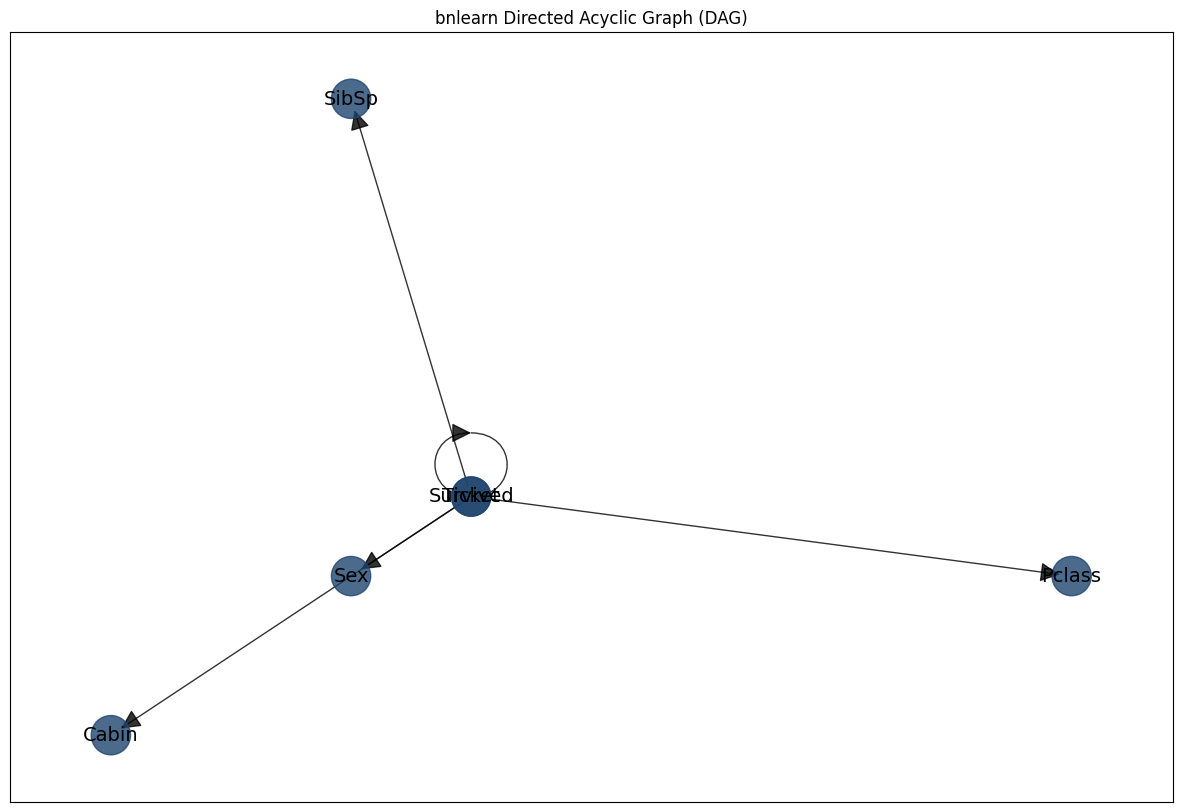

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Ticket <-> Sex] [P=0.714624] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


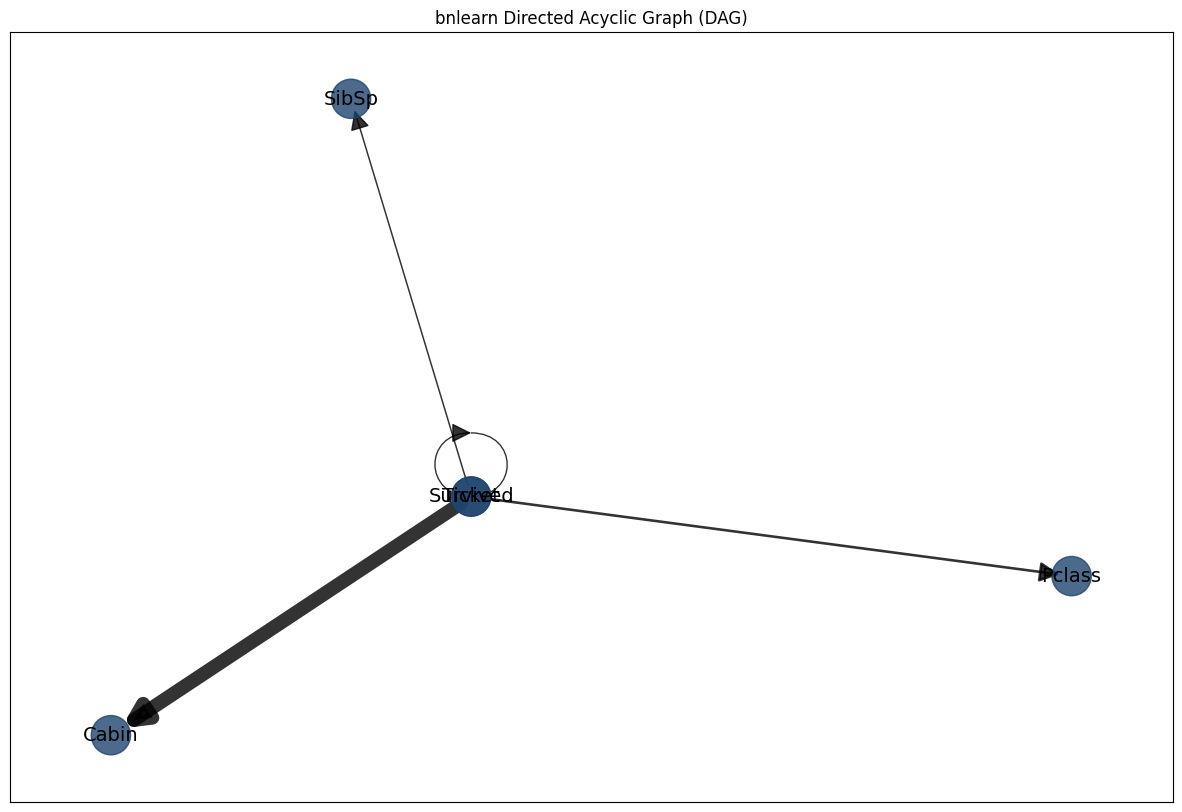

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Survived': array([-1.11022302e-17, -1.66533454e-17]),
  'Ticket': array([-1.11022302e-17, -1.66533454e-17]),
  'Cabin': array([-0.6, -0.6]),
  'Pclass': array([ 1. , -0.2]),
  'SibSp': array([-0.2,  1. ]),
  'Sex': array([-0.2, -0.2])},
 'G': <networkx.classes.digraph.DiGraph at 0x7e2560cf9d50>,
 'node_properties': {'Survived': {'node_color': '#1f456e', 'node_size': 800},
  'Ticket': {'node_color': '#1f456e', 'node_size': 800},
  'Cabin': {'node_color': '#1f456e', 'node_size': 800},
  'Pclass': {'node_color': '#1f456e', 'node_size': 800},
  'SibSp': {'node_color': '#1f456e', 'node_size': 800},
  'Sex': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Ticket', 'Cabin'): {'color': '#000000',
   'weight': 10.000000000000002},
  ('Ticket', 'Pclass'): {'color': '#000000', 'weight': 1.8749872930785187},
  ('Ticket', 'SibSp'): {'color': '#000000', 'weight': 1.0793061195273421

In [22]:
# Load library
import bnlearn as bn
# Load example
df_raw = bn.import_example(data='titanic')
# Preprocessing raw dataset
dfhot, dfnum = bn.df2onehot(df_raw)

# Structure learning
model = bn.structure_learning.fit(dfnum, methodtype='cl', black_list=['Embarked','Parch','Name'], root_node='Survived', bw_list_method='nodes')
# Plot detected DAG
G = bn.plot(model)

# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model1 = bn.independence_test(model, dfnum, alpha=0.05, prune=True)
# [bnlearn] >Edge [Ticket <-> Sex] [P=0.714624] is excluded because it was not significant (P<0.05) with [chi_square]

# Plot
bn.plot(model1, pos=G['pos'])

In [21]:
G['pos']

{'Survived': array([-1.11022302e-17, -1.66533454e-17]),
 'Ticket': array([-1.11022302e-17, -1.66533454e-17]),
 'Cabin': array([-0.6, -0.6]),
 'Pclass': array([ 1. , -0.2]),
 'SibSp': array([-0.2,  1. ]),
 'Sex': array([-0.2, -0.2])}

[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/28.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/28.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


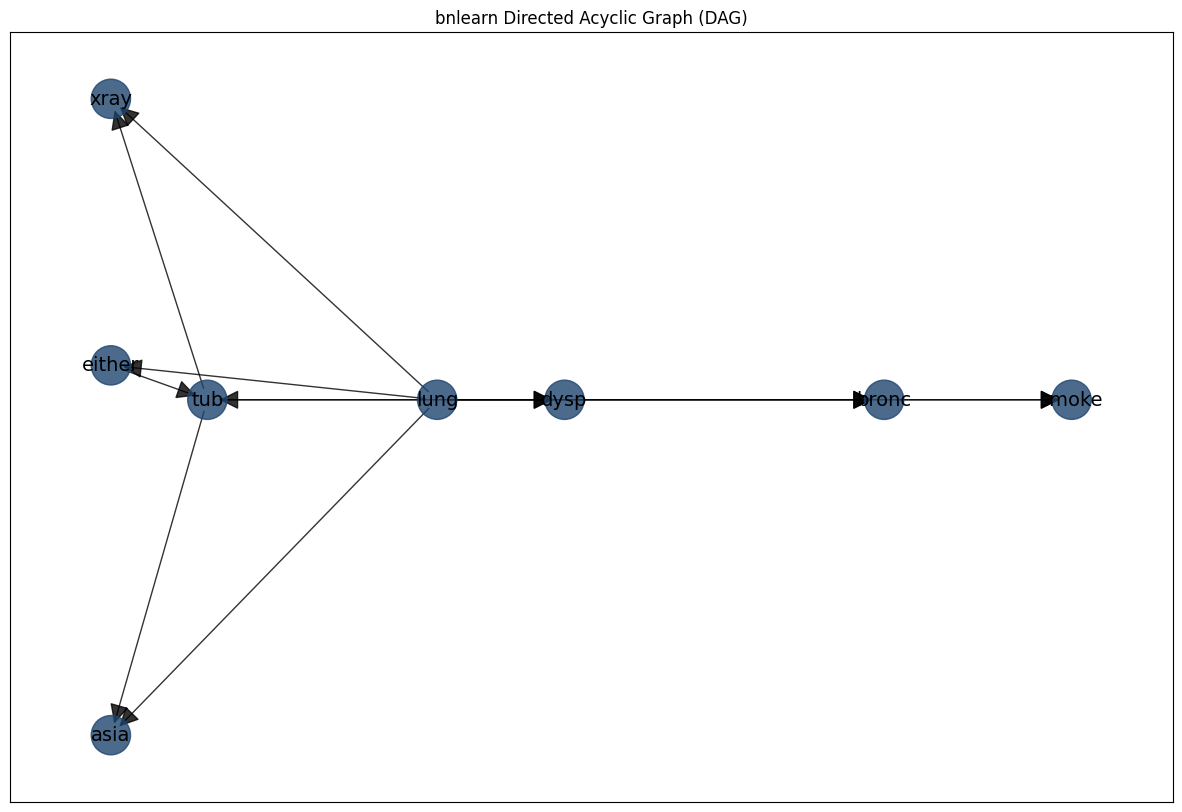

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


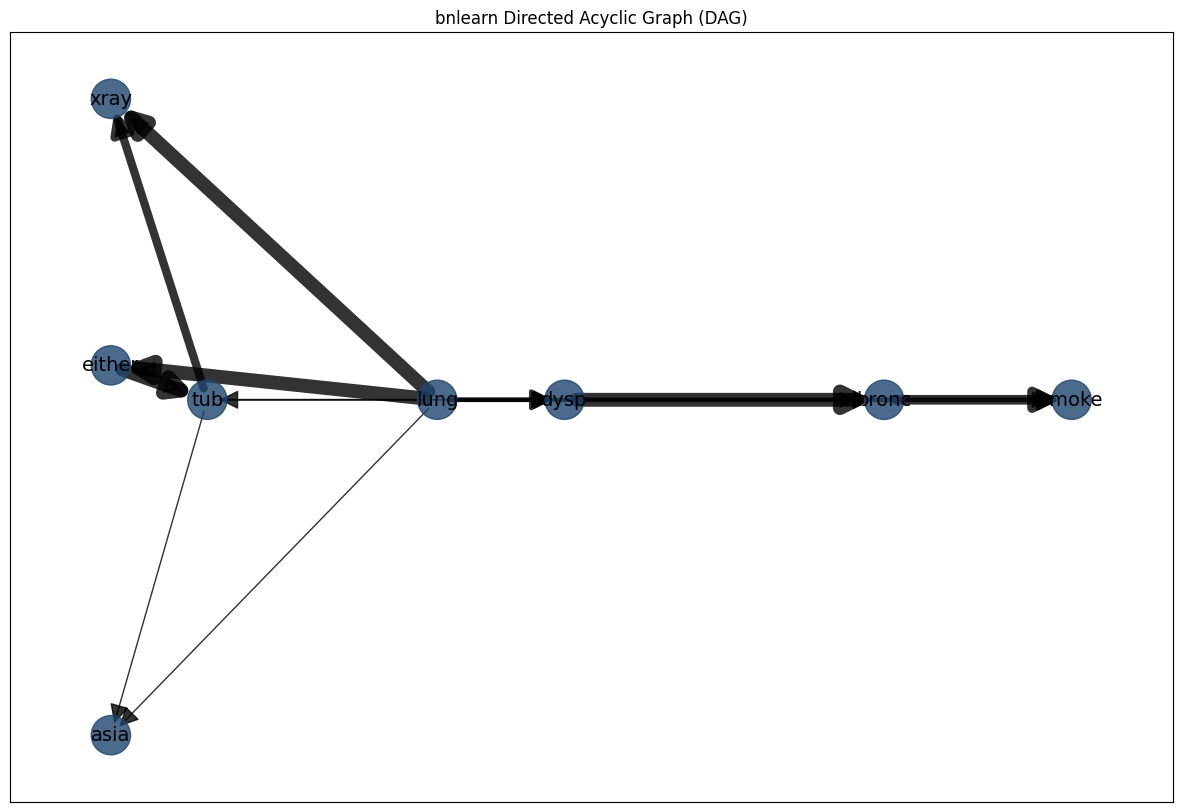

    source    target    stat_test         p_value    chi_square    dof
--  --------  --------  -----------  ------------  ------------  -----
 0  either    tub       True         0              1601.73          1
 1  tub       xray      True         4.04227e-182    828.174         1
 2  tub       dysp      True         1.31975e-16      68.4223        1
 3  tub       asia      False        0.217415          1.52135       1
 4  dysp      bronc     True         0              4824.64          1
 5  bronc     smoke     True         5.71424e-220   1002.29          1
 6  lung      asia      False        0.329182          0.952114      1
 7  lung      tub       False        1                 0             1
 8  lung      smoke     True         8.93672e-87     389.847         1
 9  lung      bronc     True         1.17713e-10      41.5026        1
10  lung      either    True         0              8272.76          1
11  lung      xray      True         0              4440.73          1
12  lu

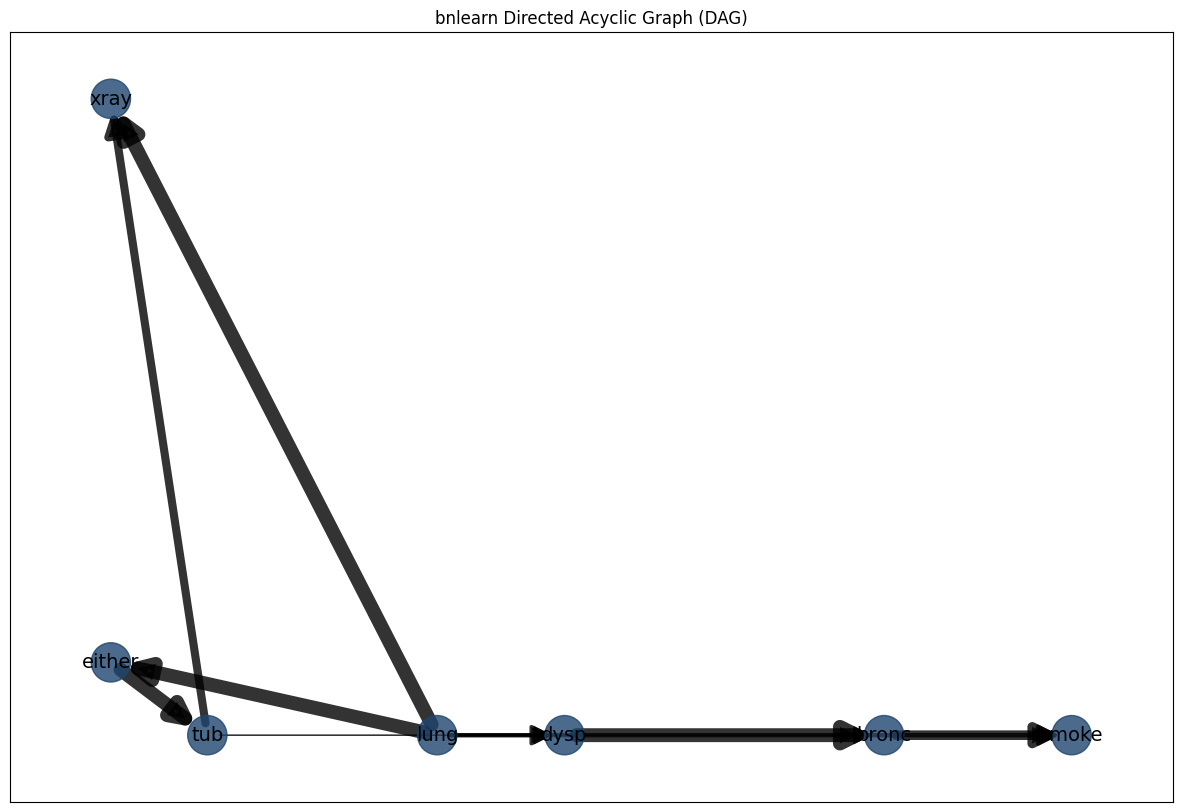

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'either': array([-0.44172961,  0.10267294]),
  'tub': array([-3.11184290e-01,  5.34633466e-16]),
  'xray': array([-0.44172961,  0.89732706]),
  'dysp': array([1.72416631e-01, 1.80450965e-16]),
  'asia': array([-0.44172961, -1.        ]),
  'bronc': array([ 6.05062889e-01, -2.83224679e-17]),
  'smoke': array([ 8.58893589e-01, -1.59795967e-15]),
  'lung': array([-1.14481552e-16, -9.50837485e-17])},
 'G': <networkx.classes.digraph.DiGraph at 0x7e25627af3d0>,
 'node_properties': {'either': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800},
  'asia': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e',

In [27]:
# Load library
import bnlearn as bn
# Load example
df = bn.import_example('asia')

# Structure learning
model = bn.structure_learning.fit(df, methodtype='tan', class_node='lung')
# Plot detected DAG
G = bn.plot(model)

# Compute edge strength using chi-square independence test
model1 = bn.independence_test(model, df, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

# Examine the output of the chi-square test. 13 edges are detected but not all P values are significant, i.e. those with stat_test=False
print(tabulate(model1['independence_test'], headers="keys"))
#    source    target    stat_test         p_value    chi_square    dof
#--  --------  --------  -----------  ------------  ------------  -----
# 0  either    xray      True         0               5589.38         1
# 1  either    tub       True         5.36195e-294    1342.91         1
# 2  either    dysp      True         2.82344e-85      382.959        1
# 3  tub       asia      False        0.104413           2.63681      1
# 4  dysp      bronc     True         0               4737.06         1
# 5  bronc     smoke     True         1.0335e-211      964.3          1
# 6  lung      asia      False        1                  0            1
# 7  lung      tub       False        0.125939           2.34186      1
# 8  lung      smoke     True         3.70391e-91      409.979        1
# 9  lung      bronc     True         1.90616e-09       36.0673       1
#10  lung      either    True         0               8604.76         1
#11  lung      xray      True         0               4800.25         1
#12  lung      dysp      True         1.34994e-76      343.097        1

# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model2 = bn.independence_test(model, df, alpha=0.05, prune=True)
# [bnlearn] >Edge [tub <-> asia] [P=0.104413] is excluded because it was not significant (P<0.05) with [chi_square]
# [bnlearn] >Edge [lung <-> asia] [P=1] is excluded because it was not significant (P<0.05) with [chi_square]
# [bnlearn] >Edge [lung <-> tub] [P=0.125939] is excluded because it was not significant (P<0.05) with [chi_square]
bn.plot(model2, pos=G['pos'])

In [34]:
[-1, -1, 5, -1, 0, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1].index(3)

6

In [35]:
mapping = [-1, -1, 5, -1, 0, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

ts = cs = 3

ts in mapping and mapping.index(ts) != cs

True

In [ ]:
# BNNW-CTDW

In [3]:
import pandas as pd

persona_filename = 'date0729_midterm_personas_full_sonnet.json'

In [4]:
import json

with open(persona_filename, 'r') as f:
    data = json.load(f)
sample_user = list(data.keys())[0]
data[sample_user]

[{'name': 'Core Personal Values',
  'description': "The participant's fundamental values, principles, and beliefs that guide their life decisions and shape their worldview on issues such as personal safety, freedom, self-reliance, non-violence, societal responsibility, and environmental conservation.",
  'level': 'high',
  'candidate_values': ['values personal safety/security',
   'values personal freedom/individual rights',
   'values self-reliance/self-sufficiency',
   'values non-violence',
   'values societal responsibility',
   'values environmental conservation'],
  'inferred_value': 'values personal safety/security'},
 {'name': 'Worldview and Belief System',
  'description': "The participant's overall belief system, worldview, and attitudes towards societal issues, crime, violence, political ideologies, cultural values, and the role of socioeconomic factors.",
  'level': 'high',
  'candidate_values': ['conservative worldview',
   'liberal worldview',
   'moderate worldview',
   

In [5]:
# verify data

def verify(data):
    ok_cnt = 0
    wrong_cnt = 0
    for user in data:
        for persona in data[user]:
            if all(_ not in persona['candidate_values'] for _ in [persona['inferred_value'], persona['inferred_value'][1:-1]]) :
                wrong_cnt += 1
                print(persona)
                print(persona['inferred_value'])
                print(persona['candidate_values'])
                print()
            else:
                ok_cnt += 1

    print(ok_cnt, wrong_cnt)

verify(data)

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or underemployed, and their perceived job security.', 'level': 'low', 'candidate_values': ['employed with job security', 'employed without job security', 'unemployed', 'underemployed'], 'inferred_value': 'Do not worry at all'}
Do not worry at all
['employed with job security', 'employed without job security', 'unemployed', 'underemployed']

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or underemployed, and their perceived job security.', 'level': 'low', 'candidate_values': ['employed with job security', 'employed without job security', 'unemployed', 'underemployed'], 'inferred_value': 'Do not worry at all'}
Do not worry at all
['employed with job security', 'employed without job security', 'unemployed', 'underemployed']

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or

In [6]:
# clean data

def clean(data):
    for user in data.keys():
        personas = data[user]
        clean = []
        for p in personas:
            inf_val = p['inferred_value']
            cands = p['candidate_values']
            if inf_val not in cands:
                if inf_val[1:-1] in cands and all(_ in ['\'', '\"'] for _ in [inf_val[0], inf_val[-1]]):
                    p['inferred_value'] = inf_val[1:-1]
                    clean.append(p)
            else:
                clean.append(p)
        data[user] = clean

clean(data)
verify(data)
with open(f"clean_{persona_filename}", "w") as f:
    json.dump(data, f, indent=4)

209730 0


In [7]:
# categorize_data

def categorize(data):
    for user in data:
        personas = data[user]
        clean = []
        for p in personas:
            inf_val = p['inferred_value']
            cands = p['candidate_values']
            p['inferred_value'] = cands.index(inf_val) + 1
            clean.append(p)
        data[user] = clean

categorize(data)
with open(f"categorized_clean_{persona_filename}", "w") as f:
    json.dump(data, f, indent=4)

In [8]:
persona_filename

'date0729_midterm_personas_full_sonnet.json'

In [9]:
res = []

for user in data.keys():
    entry = {'user': user}
    for persona in data[user]:
        entry[f"{persona['level']}/{persona['name']}"] = persona['inferred_value']
    res.append(entry)

df = pd.DataFrame(res)

In [10]:
df.fillna(0, inplace=True)
df = df.astype(int)

df

,user,high/Core Personal Values,high/Worldview and Belief System,high/Risk Attitudes and Personality Traits,high/Attitudes Towards Guns and Gun Culture,high/Cultural Background and Traditions,high/Risk Attitudes and Tolerance,high/Political Ideology on Gun Ownership and Regulation,high/Trust in Authorities and Institutions,high/Sense of Responsibility,...,low/Household Composition with Children,low/Financial and Economic Circumstances,low/Health and Lifestyle,low/Employment Status,low/Age and Life Experience,low/Geographic Risk Factors,low/Firearm-Related Recreational Activities,low/Occupational and Social Influences,low/Shooting Experience and Proficiency,low/Personal Experiences with Guns and Gun-Related Incidents
0,2820,1,3,1,3,2,1,3,2,1,...,2,2,2,1,1,2,3,3,3,3
1,3718,1,3,1,3,2,1,3,1,1,...,2,1,1,0,1,2,3,3,3,3
2,362,1,3,1,3,2,1,3,2,1,...,2,1,2,0,1,2,3,3,3,3
3,1758,1,1,2,1,1,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
4,124,1,3,1,3,2,2,3,2,1,...,2,2,2,0,1,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,4162,1,3,1,3,2,1,3,1,1,...,2,1,1,0,1,2,3,3,3,3
4164,4163,1,1,1,3,2,2,1,2,2,...,2,2,1,0,1,2,3,2,3,2
4165,4164,1,3,1,3,2,2,3,2,1,...,2,2,2,0,1,2,2,2,2,2
4166,4166,1,3,1,3,2,2,3,2,1,...,2,2,2,2,1,2,3,2,3,2


In [12]:
import networkx as nx

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot detected DAG
pos = nx.spring_layout(model['adjmat'])
G = bn.plot(model, pos=pos)

dirs = []
for edge in G['edge_properties']:
    s, t = edge
    s = s.split('/')[0]
    t = t.split('/')[0]
    dirs.append(f"{s}_{t}")

from collections import Counter
sorted(Counter(dirs).items())

NameError: name 'bn' is not defined

In [13]:
# Compute edge strength using chi-square independence test
model1 = bn.independence_test(model, df, alpha=0.05, prune=True)
pos = nx.spring_layout(model['adjmat'])
G1 = bn.plot(model, pos=pos)

dirs = []
for edge in G1['edge_properties']:
    s, t = edge
    s = s.split('/')[0]
    t = t.split('/')[0]
    dirs.append(f"{s}_{t}")

from collections import Counter
sorted(Counter(dirs).items())

NameError: name 'bn' is not defined